# Wahlomat - Datenanalyse

In [23]:
# importe 
import numpy as np 
import matplotlib.pyplot as plt 
from graph_tool.all import *
import cairo

In [24]:
# euklidian distance in 38d-space
def calc_euklidian_dist(list1, list2): 
    if len(list1) != len(list2): 
        print("ungleich lange listen, exiting ...")
        return -1
    return np.sqrt( sum([  (list1[i]-list2[i])**2  for i in range(len(list1))] ))


In [25]:
# data (encoded: 1=yes, 2=maybe, 3=no)  
cdu =[1,3,1,1,3,1,3,3,1,2,1,1,1,3,1,3,3,1,3,1,3,3,3,1,3,3,3,1,3,3,1,3,1,1,3,1,1,3]
linke =[3,1,3,1,1,3,1,1,3,1,3,1,3,1,3,1,1,3,1,3,1,2,3,1,1,3,1,3,1,3,3,1,3,1,1,3,3,1]
spd =[3,1,1,1,1,3,1,2,1,1,3,1,3,1,3,1,2,3,3,1,1,2,3,1,2,3,1,3,3,3,3,1,3,1,3,3,1,2]
afd =[1,3,1,3,2,1,3,3,1,3,1,3,1,3,2,2,3,1,3,1,3,3,1,1,3,1,3,1,3,3,1,3,3,2,3,1,1,3]
gruen =[3,1,3,1,3,3,1,1,3,1,3,1,3,3,3,2,1,3,3,3,1,1,3,3,1,3,3,3,3,1,3,1,3,1,1,3,3,1]
npd =[1,1,1,3,3,1,3,3,1,3,1,3,1,1,3,3,3,2,3,1,3,3,1,3,3,1,3,1,1,3,1,3,3,3,3,3,1,3]
fdp =[1,2,1,2,3,1,3,3,1,1,3,3,1,2,3,3,3,1,3,1,1,3,2,1,3,3,3,3,3,3,1,1,1,1,3,3,2,3]
pirat =[3,1,3,1,1,3,3,1,3,1,3,1,3,1,3,1,1,3,1,3,1,1,3,3,1,3,1,3,1,1,3,1,3,1,1,3,3,1]
partei =[1,1,1,1,1,3,2,1,3,1,3,1,3,1,3,3,1,3,1,3,1,1,3,3,1,3,1,3,2,2,3,1,3,1,1,3,1,1]
kpd =[1,1,1,1,1,3,3,3,3,1,3,1,3,1,3,1,1,3,1,3,1,3,1,1,1,3,1,3,1,1,3,1,1,3,1,3,1,1]
tsh =[1,1,1,1,3,1,3,1,2,1,3,3,1,3,1,1,3,1,3,1,1,1,1,3,3,3,3,1,3,1,1,1,3,1,3,2,3,3] 
bge =[3,1,3,1,1,3,1,1,3,1,3,1,3,1,3,1,1,3,1,3,1,1,3,1,1,3,1,3,1,1,3,1,1,1,1,3,1,1]
direkt =[3,2,2,2,3,1,2,1,2,2,2,2,3,2,1,1,1,1,1,2,1,1,3,2,2,3,1,2,3,1,3,1,1,2,1,1,1,1]
blau =[1,3,3,3,3,1,3,3,1,3,3,3,1,3,3,3,3,1,3,1,3,3,1,3,3,3,3,3,3,3,1,3,1,1,1,1,3,3]
panther =[1,1,1,1,1,1,3,1,1,1,3,1,3,1,3,1,3,1,3,1,1,1,1,3,1,1,1,1,3,1,1,3,1,1,1,1,1,1]
mpld =[3,1,3,1,1,3,2,1,3,1,2,1,3,1,3,1,1,3,1,3,1,1,3,2,1,3,1,3,1,3,3,1,3,2,3,3,1,1]
oedp =[1,1,3,1,1,1,3,1,3,1,3,1,2,1,3,3,1,3,3,3,1,1,1,3,3,3,1,3,1,1,3,1,1,1,1,3,1,1]
pfg =[2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]

parteinames = ["cdu" ,"linke" ,"spd" ,"afd" ,"gruen" ,"npd" ,"fdp" ,"pirat" ,"partei" ,"kpd" ,"tsh" ,"bge" ,"direkt" ,"blau" ,"panther" ,"mpld" ,"oedp" ,"pfg" ]
list_of_lists = [cdu ,linke ,spd ,afd ,gruen ,npd ,fdp ,pirat ,partei ,kpd ,tsh ,bge ,direkt ,blau ,panther ,mpld ,oedp ,pfg ]

N_analyzed_parties  = len(list_of_lists)
print("N_analyzed_parties", N_analyzed_parties)
N_fragen = 38

# calculate euklidian distances:
euklidian_distances = np.zeros((N_analyzed_parties, N_analyzed_parties), dtype=float)
for i in range( N_analyzed_parties ):
    for j in range( N_analyzed_parties ):  
        euklidian_distances[i][j] = calc_euklidian_dist( list_of_lists[i], list_of_lists[j] )

for partei_list in list_of_lists:
    for antwort in range(N_fragen) :
        tmp = [ "J","V","N" ][(partei_list[antwort])-1]
        counter = int(antwort)   + 1 
        partei_list[antwort] = "Q"+str(antwort).zfill(2) + "A" +  tmp

overlap = np.zeros(( N_analyzed_parties ,N_analyzed_parties ), dtype="float")
for i in range( N_analyzed_parties ): 
    for j in range( N_analyzed_parties ):
        overlap[i][j] = round(len(list( set( list_of_lists[i]).intersection(set( list_of_lists[j] )) ))/N_fragen , 4)
print("test overlap", overlap[10])
        


N_analyzed_parties 18
test overlap [0.5789 0.3158 0.3947 0.5263 0.5    0.5263 0.6053 0.4211 0.3684 0.3421
 1.     0.3158 0.3421 0.5789 0.6053 0.2895 0.4737 0.0526]


In [26]:
print("test: SPD[2]:", spd[2], " --- sollte  Q02AN sein")

test: SPD[2]: Q02AJ  --- sollte  Q02AN sein


In [27]:
print("beispielvergleich: spd und cdu")
print("len(list( set(spd).intersection(set(cdu)) ))")
print(round(len(list( set( spd ).intersection(set( cdu )) ))/N_fragen,4)) 

beispielvergleich: spd und cdu
len(list( set(spd).intersection(set(cdu)) ))
0.3684


In [28]:
# graph "diagramm" 
diagramm = graph_tool.Graph()
diagramm.set_directed(False)
# property_maps 
couplings         = diagramm.new_edge_property("float")
couplings_re      = diagramm.new_edge_property("float")
couplings_eukl_38 = diagramm.new_edge_property("float")
couplings_text    = diagramm.new_edge_property("string")
vertex_labels_by_party = diagramm.new_vertex_property("string")  # string
couplings = diagramm.new_edge_property("float")
vertex_logos = diagramm.new_vertex_property("object")  # object

logo_cdu = cairo.ImageSurface.create_from_png("logos_thueringen19/logos-cdu.png")
logo_linke = cairo.ImageSurface.create_from_png("logos_thueringen19/logos-linke.png")
logo_spd = cairo.ImageSurface.create_from_png("logos_thueringen19/logos-spd.png")
logo_afd = cairo.ImageSurface.create_from_png("logos_thueringen19/logos-afd.png")
logo_gruen = cairo.ImageSurface.create_from_png("logos_thueringen19/logos-gruen.png")
logo_npd = cairo.ImageSurface.create_from_png("logos_thueringen19/logos-npd.png")
logo_fdp = cairo.ImageSurface.create_from_png("logos_thueringen19/logos-fdp.png")
logo_pirat = cairo.ImageSurface.create_from_png("logos_thueringen19/logos-pirat.png")
logo_partei = cairo.ImageSurface.create_from_png("logos_thueringen19/logos-partei.png")
logo_kpd = cairo.ImageSurface.create_from_png("logos_thueringen19/logos-kpd.png")
logo_tsh = cairo.ImageSurface.create_from_png("logos_thueringen19/logos-tsh.png")
logo_bge = cairo.ImageSurface.create_from_png("logos_thueringen19/logos-bge.png")
logo_direkt = cairo.ImageSurface.create_from_png("logos_thueringen19/logos-direkt.png")
logo_blau = cairo.ImageSurface.create_from_png("logos_thueringen19/logos-blau.png")
logo_panther = cairo.ImageSurface.create_from_png("logos_thueringen19/logos-panther.png")
logo_mpld = cairo.ImageSurface.create_from_png("logos_thueringen19/logos-mpld.png")
logo_oedp = cairo.ImageSurface.create_from_png("logos_thueringen19/logos-oedp.png")
logo_pfg = cairo.ImageSurface.create_from_png("logos_thueringen19/logos-pfg.png")
logolist = [logo_cdu,logo_linke,logo_spd,logo_afd,logo_gruen,logo_npd,logo_fdp,logo_pirat,logo_partei,logo_kpd,logo_tsh,logo_bge,logo_direkt,logo_blau,logo_panther,logo_mpld,logo_oedp,logo_pfg]

vertices = []
for xx in parteinames: 
    vertices.append(diagramm.add_vertex())

for qq in range(len(parteinames)): 
    vertex_labels_by_party[vertices[qq]] = parteinames[qq]
    vertex_logos[ vertices[qq] ] = logolist[qq]


In [29]:
# fill the property-maps
edge_descriptors = np.zeros((N_analyzed_parties,N_analyzed_parties), dtype=np.dtype(object) )
print("test edge_descriptors [1][1] ", edge_descriptors[1][1])
min_overlap = np.amin(overlap)
for vertex1 in diagramm.vertices(): 
    for vertex2 in diagramm.vertices(): 
        # no self-loops
        if vertex1 != vertex2: 
            index1 = parteinames.index(vertex_labels_by_party[vertex1])
            index2 = parteinames.index(vertex_labels_by_party[vertex2])
            # create edges only for reasonable similar parties
            if overlap[index1][index2] > 0.65: # cutoff 60%
                if edge_descriptors[ index1 ][ index2 ] == 0 and edge_descriptors[ index2 ][ index1 ] == 0 :
                    a = diagramm.add_edge(vertex1, vertex2)
                    edge_descriptors[ index1 ][ index2 ] = a
                    couplings[a] = overlap[index1][index2]
                    couplings_re[a] = overlap[index1][index2] - min_overlap
                    couplings_text[a] = str(round(100*overlap[index1][index2],1))+"%"
                    couplings_eukl_38[a] = euklidian_distances[index1][index2]


test edge_descriptors [1][1]  0


In [30]:
# use cool spring-layouting algorithm
positions1 = sfdp_layout(diagramm, K=1000 , C=5, p=5, eweight=couplings)
positions2 = sfdp_layout(diagramm, K=1000 , C=5, p=5, eweight=couplings_eukl_38)

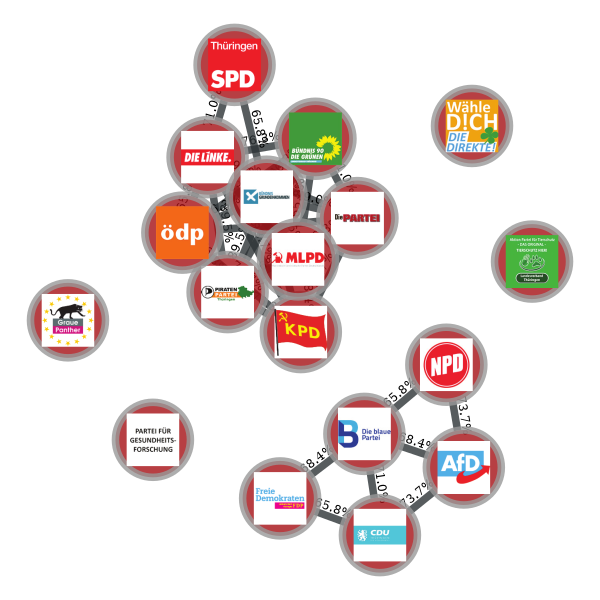

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fe50371fcd0, at 0x7fe504780c10>

In [31]:
# plot the whole thing  
graph_draw(diagramm, 
            # vertex_text=vertex_labels_by_party, 
            vertex_size=75, 
            # output_size=(1000,1000),
            # edge_pen_width=prop_to_size(couplings, mi=5),
            pos=positions1,
            vertex_surface=vertex_logos,
            edge_text=couplings_text,
            bg_color = [255,255,255,1],
            # output="brandenburg_network.png"
            )

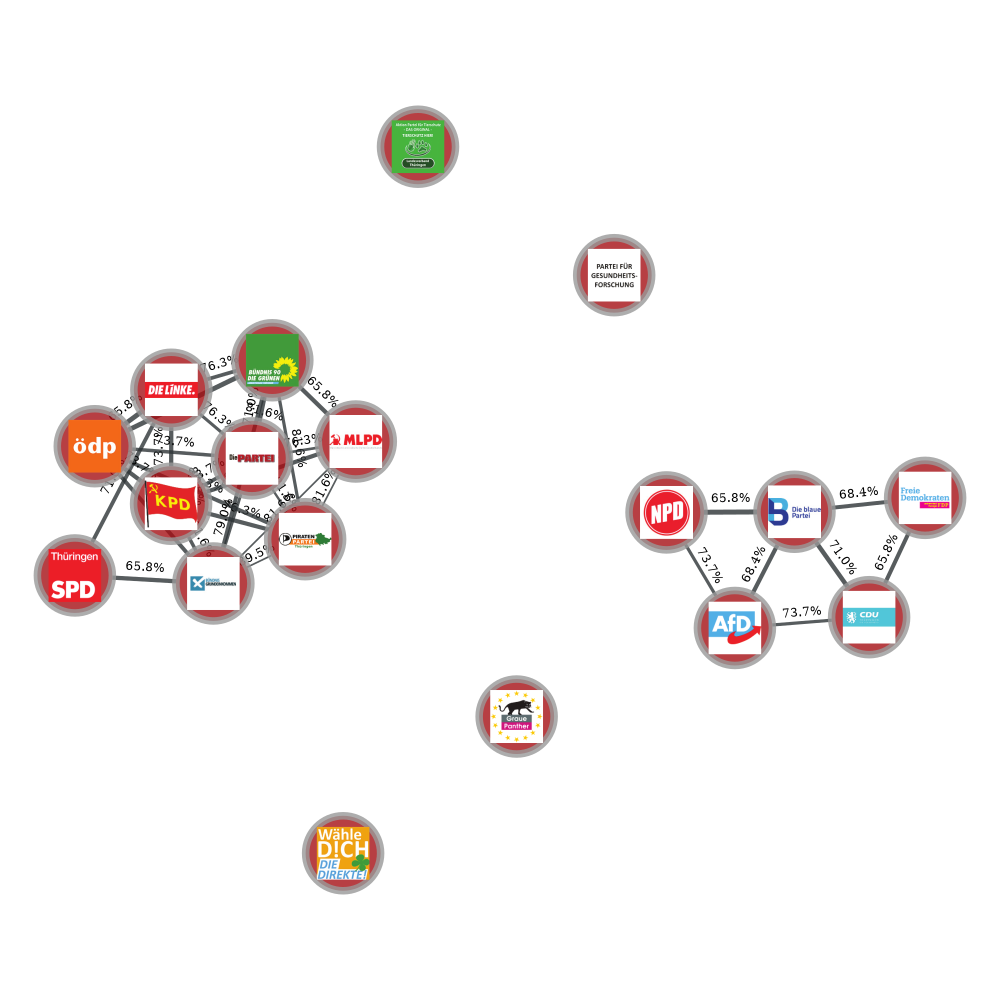

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fe50371fcd0, at 0x7fe504780750>

In [34]:
graph_draw(diagramm, 
            # vertex_text=vertex_labels_by_party, 
            vertex_size=75,
            output_size=(1000,1000),
            edge_pen_width=prop_to_size(couplings_eukl_38),
            pos=positions2,
            vertex_surface=vertex_logos,
            edge_text=couplings_text,
            bg_color = [255,255,255,1],
            )

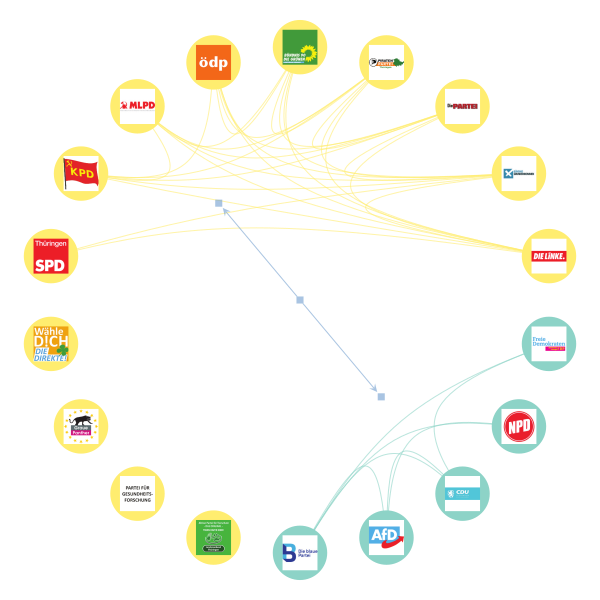

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fe50371fcd0, at 0x7fe5047d5750>,
 <Graph object, directed, with 21 vertices and 20 edges at 0x7fe515ce8210>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fe515ce8210, at 0x7fe504782bd0>)

In [33]:
# algorithm to find clusters/hierarchy
beta_s = 0.8  # "strength" to be used to investigate clusters
state = minimize_nested_blockmodel_dl(diagramm, deg_corr=True)
draw_hierarchy(state, output="diagramm_nested_model.pdf")
draw_hierarchy(state, output="diagramm_nested_model.png")
draw_hierarchy(state,beta=beta_s, 
                   # vertex_text=vertex_labels_by_party, 
                   vertex_size=50 ,
                   vertex_surface=vertex_logos,
                   # output_size=(1400,1400)
)
